/var/folders/yv/7v74fslx3c75zq5f_4bcwblm0000gn/T/ipykernel_7583/549135745.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_home['transformed_x'] = transformX(df_home['x'])
/var/folders/yv/7v74fslx3c75zq5f_4bcwblm0000gn/T/ipykernel_7583/549135745.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_home['transformed_y'] = transformY(df_home['y'])
/var/folders/yv/7v74fslx3c75zq5f_4bcwblm0000gn/T/ipykernel_7583/549135745.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

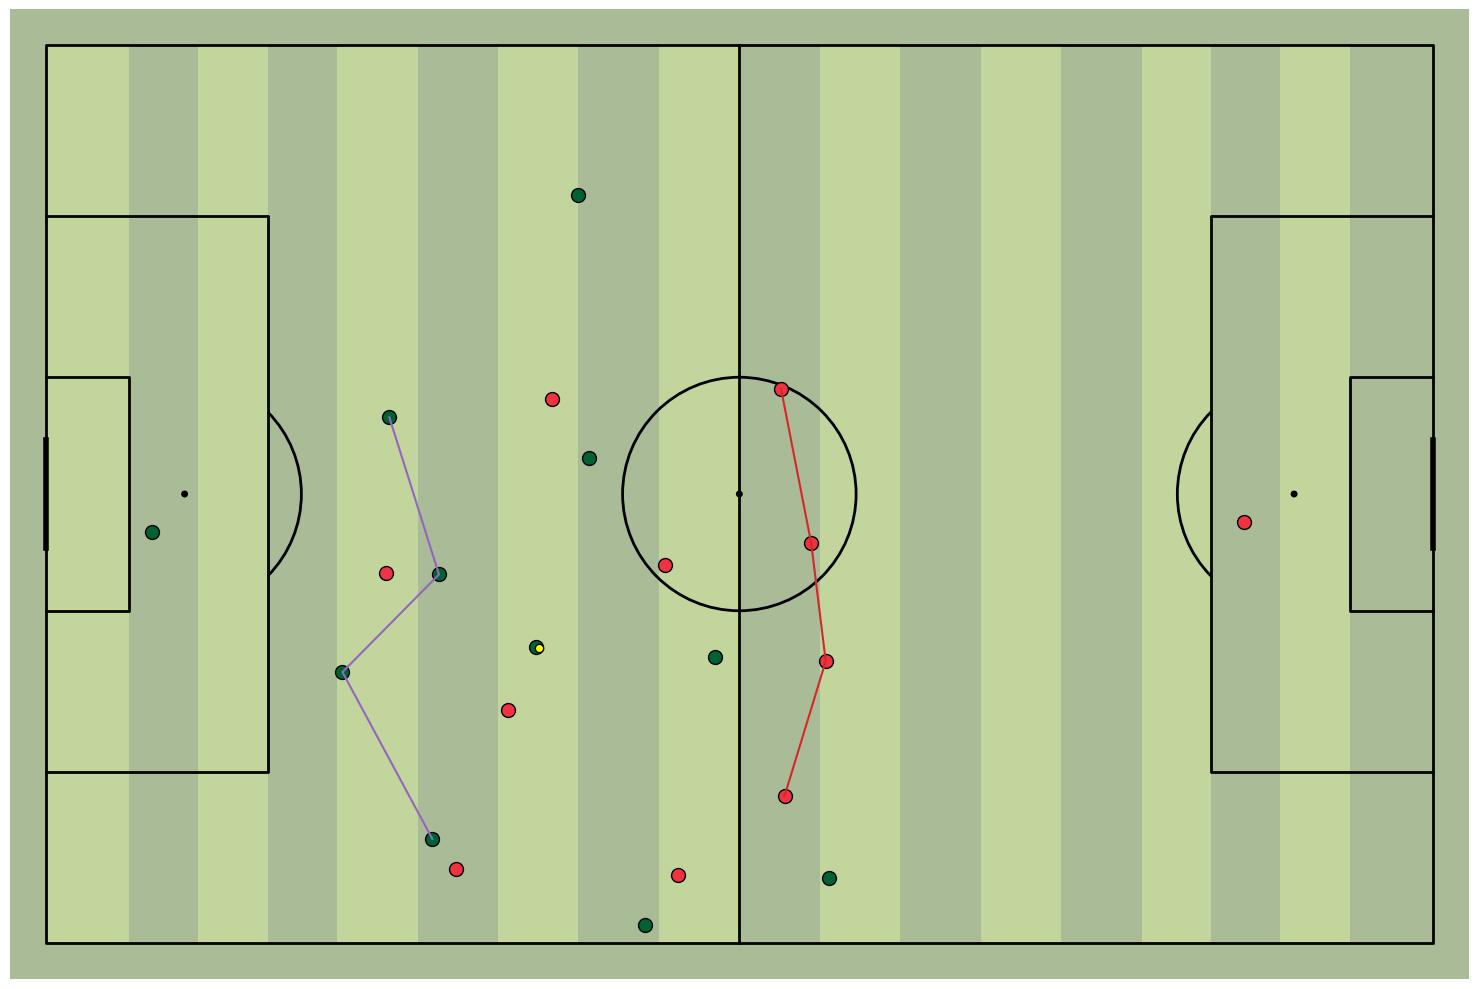

MovieWriter ffmpeg unavailable; using Pillow instead.


In [37]:
import numpy as np
import pandas as pd
from matplotlib import animation
from matplotlib import pyplot as plt
from mplsoccer import Pitch
import os
def transformX(x):
    return (x + 5250) / (2*5250) * 100
def transformY(y):
    return (1 - (y+3400)/ (2*3400)) * 100
def secondsToFrames(seconds):
    return int(seconds * 25)
def minutesToSeconds(minutes):
    return minutes*60
def minutesToFrames(minutes):
    return int(minutes*60*25)

home_team_id = 43935
away_team_id = 43872

df = pd.read_csv(os.getcwd() + '/data/tracking.csv')
pitch = Pitch(pitch_type='wyscout', goal_type='line', pitch_width=68, pitch_length=105, pitch_color='#aabb97', stripe=True, stripe_color='#c2d59d', line_color='black')
fig, ax = pitch.draw(figsize=(15, 10))

df_home = df[df['team_id'] == home_team_id]
df_away = df[df['team_id'] == away_team_id]
df_ball = df[df['team_id'] == -1]

df_home['transformed_x'] = transformX(df_home['x'])
df_home['transformed_y'] = transformY(df_home['y'])

df_away['transformed_x'] = transformX(df_away['x'])
df_away['transformed_y'] = transformY(df_away['y'])

marker = {'marker': 'o', 'markeredgecolor': 'black', 'linestyle': 'None'}
ball, = ax.plot([], [], ms=6, markerfacecolor='yellow', zorder=3, **marker)
away, = ax.plot([], [], ms=10, markerfacecolor='#006233', **marker)
home, = ax.plot([], [], ms=10, markerfacecolor='#EF3340', **marker)
homeLine, = ax.plot([], [])
awayLine, = ax.plot([], [])

def animate(i):

    #Starting minute (not accounting for halftime)
    startMinutes = 90.65           #33.75#25.42
    offset = minutesToFrames(startMinutes)

    #set ball x and y coordinates
    ball.set_data(transformX(df_ball.iloc[i+offset, 3]), transformY(df_ball.iloc[i+offset, 4]))

    # get the frame id for the ith frame
    frame = df_ball.iloc[i+offset, 0]
    
    # set the player data using the frame id
    away.set_data(transformX(df_away.loc[df_away.frame == frame, 'x']),
                  transformY(df_away.loc[df_away.frame == frame, 'y']))
    
    home.set_data(transformX(df_home.loc[df_home.frame == frame, 'x']),
                  transformY(df_home.loc[df_home.frame == frame, 'y']))
    
    if startMinutes <= 45:
        temp = df_home.loc[df_home.frame == frame]
        temp = temp.sort_values(by='transformed_x').iloc[1:4].sort_values(by='transformed_y')
        homeLine.set_data(temp['transformed_x'],
                        temp['transformed_y'])
        
        temp = df_away.loc[df_away.frame == frame]
        temp = temp.sort_values(by='transformed_x', ascending=False).iloc[1:4].sort_values(by='transformed_y', ascending=False)
        awayLine.set_data(temp['transformed_x'],
                        temp['transformed_y'])
    else:
        temp = df_home.loc[df_home.frame == frame]
        temp = temp.sort_values(by='transformed_x', ascending=False).iloc[1:5].sort_values(by='transformed_y', ascending=False)
        homeLine.set_data(temp['transformed_x'],
                        temp['transformed_y'])
        
        temp = df_away.loc[df_away.frame == frame]
        temp = temp.sort_values(by='transformed_x').iloc[1:5].sort_values(by='transformed_y')
        awayLine.set_data(temp['transformed_x'],
                        temp['transformed_y'])

    return ball, away, home, homeLine, awayLine

clip_length = minutesToFrames(0.4)
anim = animation.FuncAnimation(fig, animate, clip_length, interval=25, blit=True)

plt.show()
#save animation
# anim.save('Graphics/1-0_Animation.gif', fps=25)

anim.save('Graphics/Foul_Animation.gif', fps=25)
#plt.show()




## INTERPRETATIONS


### FIRST GOAL


The first animation shows the origin of the foul that lead to the goal. Even though Belgium are well structured, one long pass to the left winger breaks that order, because Belgiums right back was not standing where he should have. That is why Moroccos left winger gets the ball in the first place. Afterwards, it is difficult to say if the foul was necessary or not.

Even though Belgium has more players in the box, a moroccan player gets the ball and from that distance, there is not much Courtois could have done.

### SECOND GOAL


This animation shows the second goal in the 92nd minute. We can easily see that Morocco was playing with a back 5 in this phase of the game, while Belgium was playing with a back 3. It took Morocco exactly 11.52 seconds from the goalkick to the goal, which also shows how little resistance they faced. 
When the ball came down from the goalkick, we can see that the left defender in the back 3 is standing far too wide outside instead of moving inwards with the only opponent nearby. By doing so, he lets the opponent forward the ball to Ziyech, who has not much trouble passing by two defenders to provide the assist. 

The second plot shows the moment of the shot. We can see that there were only 3 attackers in the box and they managed to score against 5 defenders. This was mainly because no defender was near enough to  ??? when he took the shot. 